# Gamesight Genre Analysis

This notebook analyzes the dataset from Gamesight.io, focusing on game genres and their positive review ratios.

## 1. Import Libraries and Load Data

We will import the necessary libraries and load the CSV data into a pandas DataFrame.

In [5]:
%pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Load the CSV file
df = pd.read_csv("C:/Users/paulg_pxqximm/Downloads/gamesight.db.csv", index_col=0)

Note: you may need to restart the kernel to use updated packages.


## 2. Explore DataFrame Structure

Let's look at the first few rows to understand the structure of the dataset.

In [6]:
df.head()

,release_date,genres,game_positive_review_count,game_negative_review_count,game_price
game,,,,,
Borderlands Game of the Year,NaN,"Action,Action RPG,Adventure,Co-op,Comedy,Dark ...",26657,2847,29.99
Earthworm Jim,NaN,"2D,Action,Adventure,Classic,Comedy,Masterpiece...",39,45,NaN
GRID 2,NaN,"3D Vision,Action,Adventure,Arcade,Casual,Co-op...",22851,4511,NaN
Darksiders II,NaN,"Action,Action RPG,Action-Adventure,Adventure,B...",5608,612,NaN
Realm of the Mad God Exalt,NaN,"2D,Action,Adventure,Bullet Hell,Casual,Co-op,D...",23429,4732,NaN


## 3. Explode Genres Column

The 'genres' column contains multiple genres separated by commas. We'll split this column and explode the DataFrame so each genre has its own row.

In [7]:
# Split genres and explode the DataFrame
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split(',')
df_exploded = df_exploded.explode('genres')
df_exploded['genres'] = df_exploded['genres'].str.strip()

df_exploded.head()

,release_date,genres,game_positive_review_count,game_negative_review_count,game_price
game,,,,,
Borderlands Game of the Year,NaN,Action,26657,2847,29.99
Borderlands Game of the Year,NaN,Action RPG,26657,2847,29.99
Borderlands Game of the Year,NaN,Adventure,26657,2847,29.99
Borderlands Game of the Year,NaN,Co-op,26657,2847,29.99
Borderlands Game of the Year,NaN,Comedy,26657,2847,29.99


## 4. Calculate Positive Review Ratio

We'll add a new column, `positive_review_ratio`, to both the original and exploded DataFrames. This column represents the ratio of positive reviews to total reviews for each game.

In [8]:
df['positive_review_ratio'] = df['game_positive_review_count'] / (df['game_positive_review_count'] + df['game_negative_review_count'])
df_exploded['positive_review_ratio'] = df_exploded['game_positive_review_count'] / (df_exploded['game_positive_review_count'] + df_exploded['game_negative_review_count'])

## 5. Bin Positive Review Ratios

To make analysis and visualization easier, we'll create bins for the positive review ratio and add a `review_ratio_bin` column to both DataFrames.

In [9]:
bins = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']

df['review_ratio_bin'] = pd.cut(df['positive_review_ratio'], bins=bins, labels=labels, include_lowest=True)
df_exploded['review_ratio_bin'] = pd.cut(df_exploded['positive_review_ratio'], bins=bins, labels=labels, include_lowest=True)

## 6. Genre-Level Analysis

Let's analyze the average positive review ratio and the number of games for each genre.

In [10]:
# Calculate average positive review ratio by genre
avg_ratio_by_genre = df_exploded.groupby('genres')['positive_review_ratio'].mean()

# Count number of games per genre
count_by_genre = df_exploded['genres'].value_counts()

print("Average positive review ratio by genre:")
print(avg_ratio_by_genre)

print("\nNumber of games per genre:")
print(count_by_genre)

Average positive review ratio by genre:
genres
1980s           0.866356
1990's          0.904419
2.5D            0.837200
2D              0.892348
2D Fighter      0.832934
                  ...   
World War I     0.837910
World War II    0.807103
Wrestling       0.721488
Zombies         0.837615
e-sports        0.813150
Name: positive_review_ratio, Length: 388, dtype: float64

Number of games per genre:
genres
Action                   865
Singleplayer             793
Adventure                670
Multiplayer              562
Atmospheric              441
                        ... 
Touch-Friendly             1
Snow                       1
4X                         1
Traditional Roguelike      1
Match 3                    1
Name: count, Length: 388, dtype: int64


## 7. Filter Genres by Game Count

We'll filter genres that appear in more than 200 games, then display the top genres by average positive review ratio.

In [11]:
# genres with more than 200 games
valid_genres_200 = count_by_genre[count_by_genre > 200].index
filtered_avg_ratio_200 = avg_ratio_by_genre.loc[valid_genres_200]
top_10_filtered_200 = filtered_avg_ratio_200.sort_values(ascending=False).head(10)
print("\nTop 10 genres by average positive review ratio (game count > 200):")
print(top_10_filtered_200)


Top 10 genres by average positive review ratio (game count > 200):
genres
Great Soundtrack    0.887898
Difficult           0.879603
Funny               0.878630
Indie               0.876511
Story Rich          0.873501
Atmospheric         0.866092
Horror              0.863436
Singleplayer        0.861638
First-Person        0.854785
Adventure           0.854190
Name: positive_review_ratio, dtype: float64


## 8. Visualize Top Genres by Positive Review Ratio

Let's plot a bar chart of the top genres by average positive review ratio (for genres with more than 200 games).

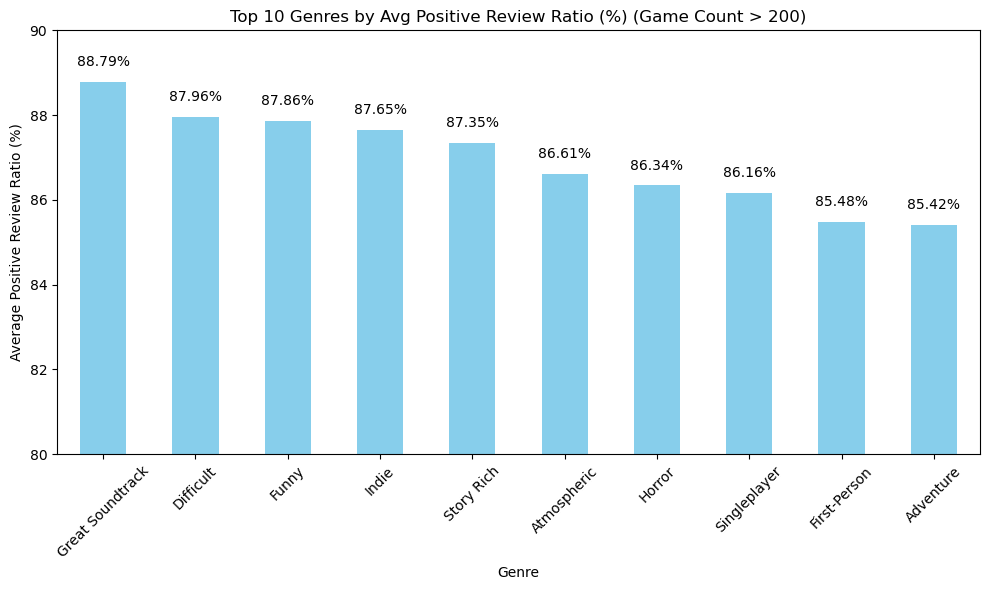

In [12]:
top_10_filtered_200_percentage = top_10_filtered_200 * 100

ax = top_10_filtered_200_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Genres by Avg Positive Review Ratio (%) (Game Count > 200)')
plt.ylabel('Average Positive Review Ratio (%)')
plt.xlabel('Genre')
plt.ylim(80, 90)  # setting y-axis limits for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(top_10_filtered_200_percentage):
    ax.text(i, v + 0.3, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()

#### Super, now we know what the top 10 positive review genres are after filtering down to more common genres. Though, after running this, I realized that I don't really own/play a lot of Great Soundtrack / Difficult / Funny games (I guess Elden Ring had its share of jokes). Is this because of me, or, are there not a ton of games that have these co-occuring genres?

## 9. Genre Co-occurrence Analysis

Let's analyze which genres frequently appear together in games. This will help us understand:
1. Common genre combinations
2. Which genres are most likely to be paired together
3. Visualize the relationships between different genres

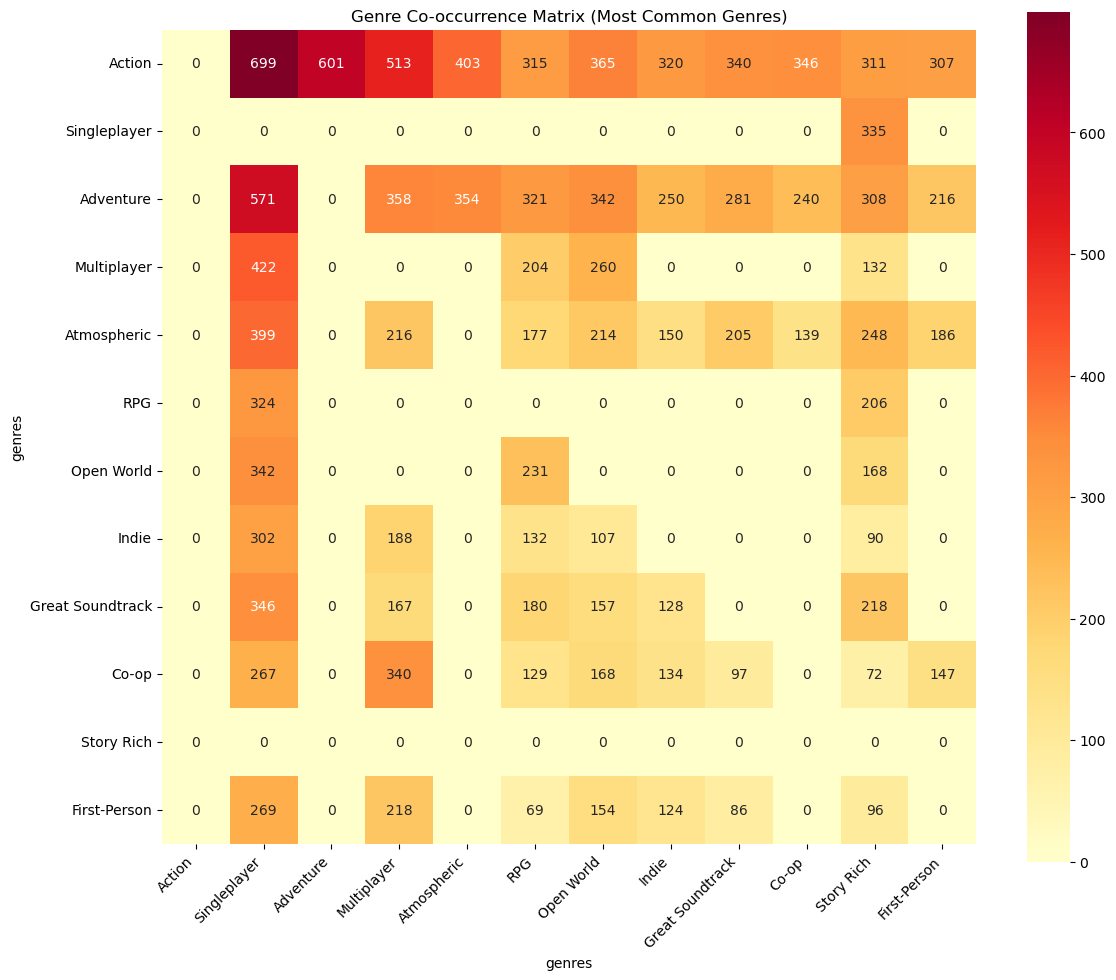


Top 10 Most Common Genre Combinations:
            genre1        genre2  count
1856        Action  Singleplayer    699
1579        Action     Adventure    601
2916     Adventure  Singleplayer    571
1767        Action   Multiplayer    513
18406  Multiplayer  Singleplayer    422
1592        Action   Atmospheric    403
4293   Atmospheric  Singleplayer    399
1789        Action    Open World    365
2830     Adventure   Multiplayer    358
2672     Adventure   Atmospheric    354


In [13]:

# create a pivot table for genre co-occurrences
def get_genre_combinations(x):
    genres = sorted(x)  
    return list(combinations(genres, 2))

# get genre combinations for each game
genre_combinations = df['genres'].str.split(',').apply(lambda x: [g.strip() for g in x]).apply(get_genre_combinations)
genre_combinations = genre_combinations.explode() # love that

# count co-occurrences
co_occurrences = pd.DataFrame(genre_combinations.tolist(), columns=['genre1', 'genre2'])
co_occurrence_counts = pd.crosstab(co_occurrences['genre1'], co_occurrences['genre2'])

# find the most common genres (appearing in more than 300 games)
genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()
top_genres = genre_counts[genre_counts > 300].index

# filter co-occurrence matrix for top genres only
filtered_matrix = co_occurrence_counts.loc[top_genres, top_genres]

# plot the heatmap for top genres
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_matrix, 
            annot=True, 
            fmt='g', 
            cmap='YlOrRd',
            square=True)
plt.title('Genre Co-occurrence Matrix (Most Common Genres)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# find top genre combinations
print("\nTop 10 Most Common Genre Combinations:")
top_combinations = (
    co_occurrences.groupby(['genre1', 'genre2'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)
)
print(top_combinations)